In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os

image_folder = os.path.join('/content/drive/My Drive/', 'NR_IMAGE')


image_files = os.listdir(image_folder)

# Filter the list to only include files with the extension '.png'
png_files = [file for file in image_files if file.endswith('.png')]

# Read the first image in the list
first_image_path = os.path.join(image_folder, png_files[0])
import cv2
image = cv2.imread(first_image_path)


In [4]:
import numpy as np

# Parameters
img_size = (128, 128)  # Resize images to 128x128 for simplicity

# Preprocess all images
processed_images = []
for file in png_files:
    img_path = os.path.join(image_folder, file)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
    img = cv2.resize(img, img_size)  # Resize image
    img = img / 255.0  # Normalize pixel values to [0, 1]
    processed_images.append(img)

# Convert the list of images to a numpy array
X = np.array(processed_images)
X = X.reshape(-1, 128, 128, 1)  # Reshape for CNN (assuming grayscale, 1 channel)


In [5]:


y = np.random.randint(2, size=len(processed_images))  # Random binary labels


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Use 'softmax' for multi-class classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Use 'categorical_crossentropy' for multi-class


In [7]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


Epoch 1/10
1/1 [==============================] - 6s 6s/step - loss: 0.6932 - accuracy: 0.4688 - val_loss: 2.7527 - val_accuracy: 0.7500
Epoch 2/10
1/1 [==============================] - 0s 87ms/step - loss: 4.5004 - accuracy: 0.5938 - val_loss: 0.8940 - val_accuracy: 0.7500
Epoch 3/10
1/1 [==============================] - 0s 69ms/step - loss: 1.4403 - accuracy: 0.5938 - val_loss: 1.0216 - val_accuracy: 0.2500
Epoch 4/10
1/1 [==============================] - 0s 54ms/step - loss: 0.8777 - accuracy: 0.4062 - val_loss: 1.0288 - val_accuracy: 0.2500
Epoch 5/10
1/1 [==============================] - 0s 50ms/step - loss: 0.8822 - accuracy: 0.4062 - val_loss: 0.9809 - val_accuracy: 0.2500
Epoch 6/10
1/1 [==============================] - 0s 56ms/step - loss: 0.8507 - accuracy: 0.4062 - val_loss: 0.9146 - val_accuracy: 0.2500
Epoch 7/10
1/1 [==============================] - 0s 71ms/step - loss: 0.8088 - accuracy: 0.4062 - val_loss: 0.8486 - val_accuracy: 0.2500
Epoch 8/10
1/1 [=============

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Use the original generator for the validation data, without augmentation
validation_datagen = ImageDataGenerator(rescale=1./255)

# Apply the generators to your datasets
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
validation_generator = validation_datagen.flow(X_val, y_val, batch_size=32)


In [9]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Initialize callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5)

# Train the model with callbacks
model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/100
1/1 [==============================] - 1s 743ms/step - loss: 0.6927 - accuracy: 0.5938 - val_loss: 0.6868 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 2/100
1/1 [==============================] - 0s 109ms/step - loss: 0.6908 - accuracy: 0.5938 - val_loss: 0.6794 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 3/100
1/1 [==============================] - 0s 123ms/step - loss: 0.6882 - accuracy: 0.5938 - val_loss: 0.6682 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 4/100
1/1 [==============================] - 0s 109ms/step - loss: 0.6847 - accuracy: 0.5938 - val_loss: 0.6530 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 5/100
1/1 [==============================] - 0s 109ms/step - loss: 0.6805 - accuracy: 0.5938 - val_loss: 0.6339 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 6/100
1/1 [==============================] - 0s 113ms/step - loss: 0.6768 - accuracy: 0.5938 - val_loss: 0.6126 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 7/100
1/1 [==============================] - 0s 108ms/step - loss: 0.6

In [14]:
# Preprocess all images using the cv
processed_images = []
for file in png_files:
    img_path = os.path.join(image_folder, file)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
    img = cv2.resize(img, img_size)  # Resize image
    img = img / 255.0  # Normalize pixel values to [0, 1]
    processed_images.append(img)

# Convert the list of images to a numpy array
X = np.array(processed_images)
X = X.reshape(-1, 128, 128, 1)  # Reshape for CNN (assuming grayscale, 1 channel)


In [15]:
# Apply median filter to reduce noise
processed_images = []
for img in processed_images:
    img = cv2.medianBlur(img, 5)
    processed_images.append(img)

# Apply adaptive thresholding to enhance contrast
processed_images = []
for img in processed_images:
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    processed_images.append(img)

# Convert the list of images to a numpy array
X = np.array(processed_images)
X = X.reshape(-1, 128, 128, 1)  # Reshape for CNN (assuming grayscale, 1 channel)

# Train the model with the preprocessed data
model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))


Epoch 1/20
1/1 [==============================] - 0s 91ms/step - loss: 0.6730 - accuracy: 0.5938 - val_loss: 0.6125 - val_accuracy: 0.7500
Epoch 2/20
1/1 [==============================] - 0s 49ms/step - loss: 0.6730 - accuracy: 0.5938 - val_loss: 0.6126 - val_accuracy: 0.7500
Epoch 3/20
1/1 [==============================] - 0s 50ms/step - loss: 0.6730 - accuracy: 0.5938 - val_loss: 0.6128 - val_accuracy: 0.7500
Epoch 4/20
1/1 [==============================] - 0s 72ms/step - loss: 0.6729 - accuracy: 0.5938 - val_loss: 0.6129 - val_accuracy: 0.7500
Epoch 5/20
1/1 [==============================] - 0s 51ms/step - loss: 0.6729 - accuracy: 0.5938 - val_loss: 0.6131 - val_accuracy: 0.7500
Epoch 6/20
1/1 [==============================] - 0s 49ms/step - loss: 0.6728 - accuracy: 0.5938 - val_loss: 0.6133 - val_accuracy: 0.7500
Epoch 7/20
1/1 [==============================] - 0s 46ms/step - loss: 0.6728 - accuracy: 0.5938 - val_loss: 0.6134 - val_accuracy: 0.7500
Epoch 8/20
1/1 [===========

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = datagen.flow(X_train, y_train, batch_size=32)
validation_generator = datagen.flow(X_val, y_val, batch_size=32)
model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
)


Epoch 1/100
1/1 [==============================] - 0s 261ms/step - loss: 0.6757 - accuracy: 0.5938 - val_loss: 0.6190 - val_accuracy: 0.7500
Epoch 2/100
1/1 [==============================] - 0s 124ms/step - loss: 0.6757 - accuracy: 0.5938 - val_loss: 0.6184 - val_accuracy: 0.7500
Epoch 3/100
1/1 [==============================] - 0s 119ms/step - loss: 0.6753 - accuracy: 0.5938 - val_loss: 0.6186 - val_accuracy: 0.7500
Epoch 4/100
1/1 [==============================] - 0s 114ms/step - loss: 0.6755 - accuracy: 0.5938 - val_loss: 0.6189 - val_accuracy: 0.7500
Epoch 5/100
1/1 [==============================] - 0s 105ms/step - loss: 0.6758 - accuracy: 0.5938 - val_loss: 0.6193 - val_accuracy: 0.7500
Epoch 6/100
1/1 [==============================] - 0s 115ms/step - loss: 0.6753 - accuracy: 0.5938 - val_loss: 0.6188 - val_accuracy: 0.7500
Epoch 7/100
1/1 [==============================] - 0s 119ms/step - loss: 0.6757 - accuracy: 0.5938 - val_loss: 0.6168 - val_accuracy: 0.7500
Epoch 8/100
1

In [17]:
# Early stop to improve the accuray

# Initialize callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model with callbacks
model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)


Epoch 1/100
1/1 [==============================] - 0s 186ms/step - loss: 0.6753 - accuracy: 0.5938 - val_loss: 0.6148 - val_accuracy: 0.7500
Epoch 2/100
1/1 [==============================] - 0s 108ms/step - loss: 0.6755 - accuracy: 0.5938 - val_loss: 0.6147 - val_accuracy: 0.7500
Epoch 3/100
1/1 [==============================] - 0s 106ms/step - loss: 0.6750 - accuracy: 0.5938 - val_loss: 0.6153 - val_accuracy: 0.7500
Epoch 4/100
1/1 [==============================] - 0s 112ms/step - loss: 0.6753 - accuracy: 0.5938 - val_loss: 0.6159 - val_accuracy: 0.7500
Epoch 5/100
1/1 [==============================] - 0s 108ms/step - loss: 0.6757 - accuracy: 0.5938 - val_loss: 0.6152 - val_accuracy: 0.7500


In [33]:


# Define the model with Adam optimizer
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu',input_shape=(128,128,1)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')

])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))






Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.7005 - accuracy: 0.4062 - val_loss: 0.5655 - val_accuracy: 0.7500
Epoch 2/100
1/1 [==============================] - 0s 54ms/step - loss: 0.7907 - accuracy: 0.5938 - val_loss: 0.6382 - val_accuracy: 0.7500
Epoch 3/100
1/1 [==============================] - 0s 54ms/step - loss: 0.6774 - accuracy: 0.5938 - val_loss: 0.6847 - val_accuracy: 0.7500
Epoch 4/100
1/1 [==============================] - 0s 54ms/step - loss: 0.6898 - accuracy: 0.5938 - val_loss: 0.6809 - val_accuracy: 0.7500
Epoch 5/100
1/1 [==============================] - 0s 55ms/step - loss: 0.6887 - accuracy: 0.5938 - val_loss: 0.6624 - val_accuracy: 0.7500
Epoch 6/100
1/1 [==============================] - 0s 57ms/step - loss: 0.6830 - accuracy: 0.5938 - val_loss: 0.6385 - val_accuracy: 0.7500
Epoch 7/100
1/1 [==============================] - 0s 58ms/step - loss: 0.6775 - accuracy: 0.5938 - val_loss: 0.6123 - val_accuracy: 0.7500
Epoch 8/100
1/1 [=====

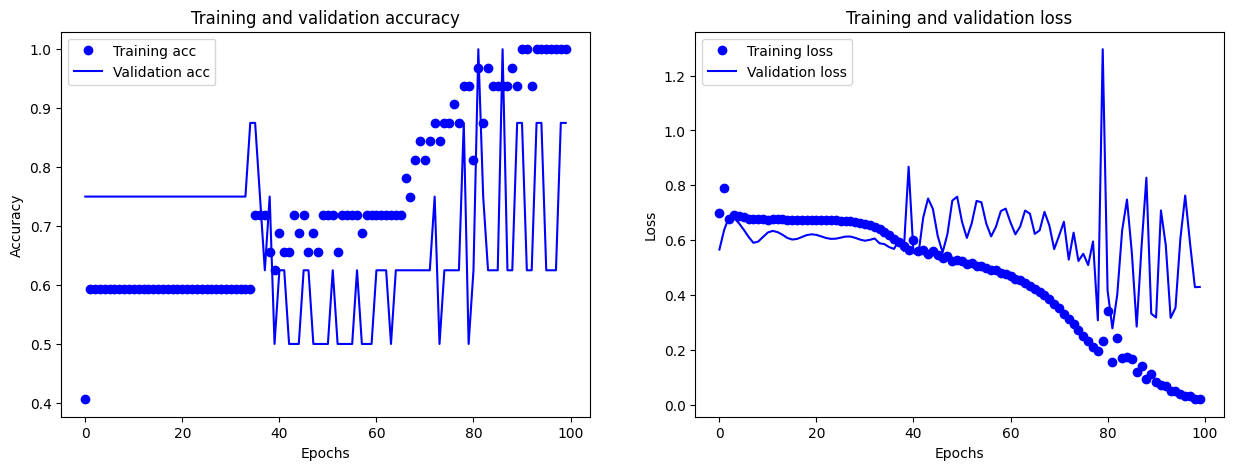

In [34]:


import matplotlib.pyplot as plt

# Get the training and validation accuracy values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Get the training and validation loss values
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(len(acc))

# Create a figure with two subplots
plt.figure(figsize=(15, 5))

# First subplot: Training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Second subplot: Training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.show()


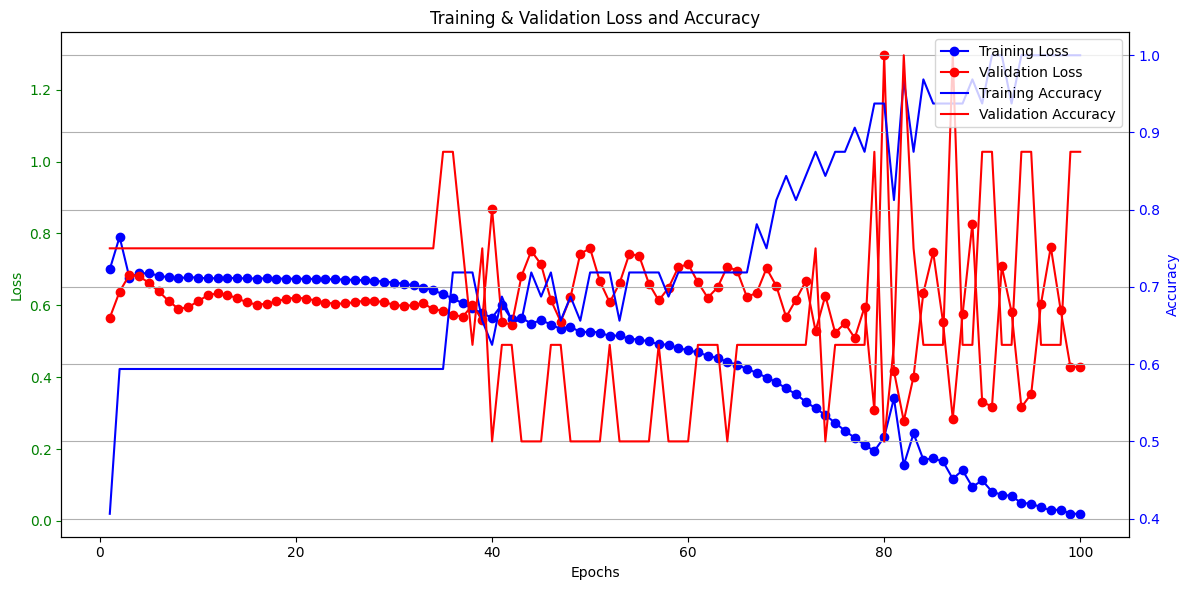

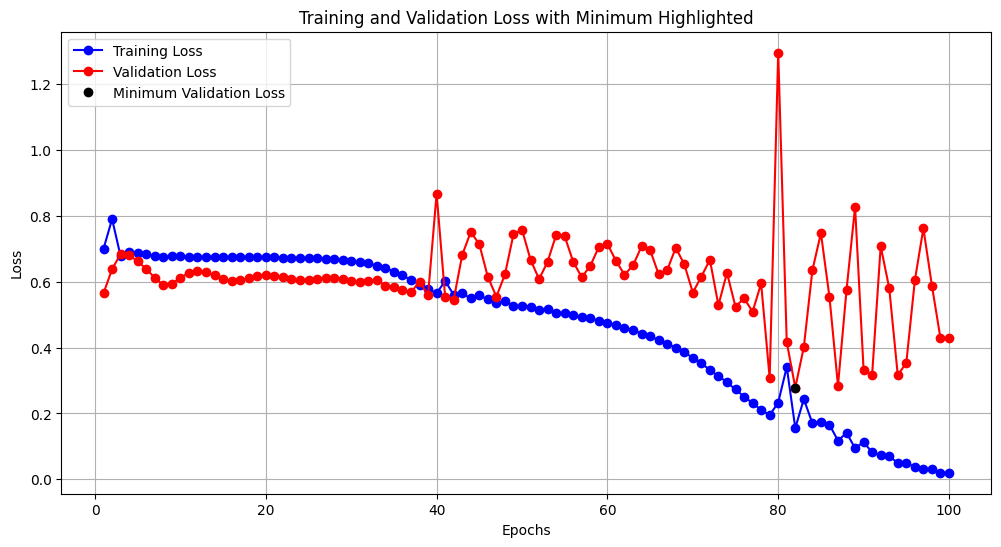

In [35]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy values
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

# Plotting both loss and accuracy
fig, ax1 = plt.subplots(figsize=(12, 6))

# Twin axis for accuracy
ax2 = ax1.twinx()

# Plotting training and validation loss
ax1.plot(epochs, loss, 'bo-', label='Training Loss')
ax1.plot(epochs, val_loss, 'ro-', label='Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='g')
ax1.tick_params('y', colors='g')

# Plotting training and validation accuracy
ax2.plot(epochs, accuracy, 'b-', label='Training Accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
ax2.set_ylabel('Accuracy', color='b')
ax2.tick_params('y', colors='b')

# Added title and legend
plt.title('Training & Validation Loss and Accuracy')
fig.tight_layout()

# Adding legend (combining handles from both axes)
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
plt.legend(handles1 + handles2, labels1 + labels2, loc='upper right')

plt.grid(True)
plt.show()

# Highlighting the epoch with the minimum validation loss
min_val_loss_epoch = val_loss.index(min(val_loss)) + 1
plt.figure(figsize=(12, 6))
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.plot(min_val_loss_epoch, min(val_loss), 'ko', label='Minimum Validation Loss')
plt.title('Training and Validation Loss with Minimum Highlighted')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
